In [2]:
!pip install -q gym
!pip install -q keras-rl2
!pip install -q gym[classic_control]

     |████████████████████████████████| 52 kB 769 kB/s 
     |████████████████████████████████| 18.3 MB 135 kB/s 


In [31]:
import gym
import random
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from rl.agents import SARSAAgent
from rl.policy import EpsGreedyQPolicy
import matplotlib.pyplot as plt

In [4]:
env = gym.make('CartPole-v1')

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
states = env.observation_space.shape[0]
actions = env.action_space.n

In [6]:
def agent(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape = (1, states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model
  
model = agent(env.observation_space.shape[0], env.action_space.n)

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 2)                 50        
                                                                 
Total params: 1,370
Trainable params: 1,370
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
policy = EpsGreedyQPolicy()

In [8]:
sarsa = SARSAAgent(model = model, policy = policy, nb_actions = env.action_space.n)

In [9]:
sarsa.compile('adam', metrics = ['mse'])

In [36]:
history = sarsa.fit(env, nb_steps=50000, visualize = False, verbose = 1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 78s 8ms/step - reward: 1.0000
33 episodes - episode_reward: 302.939 [19.000, 500.000] - loss: 8.400 - mse: 2649.708 - mean_q: 72.354

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 80s 8ms/step - reward: 1.0000
49 episodes - episode_reward: 201.633 [10.000, 500.000] - loss: 7.161 - mse: 2258.099 - mean_q: 65.633

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 76s 8ms/step - reward: 1.0000
44 episodes - episode_reward: 228.023 [8.000, 500.000] - loss: 7.188 - mse: 2480.869 - mean_q: 68.447

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 76s 8ms/step - reward: 1.0000
26 episodes - episode_reward: 375.462 [10.000, 500.000] - loss: 7.301 - mse: 2952.034 - mean_q: 76.521

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 76s 8ms/step - reward: 1.0000


In [27]:
loss = [6.945, 7.341, 11.264, 8.297]
interval = [1, 2, 3, 4]

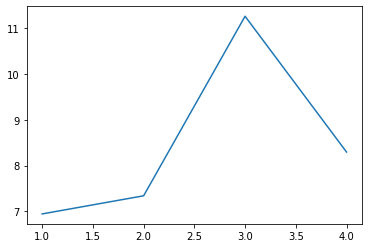

In [30]:
plt.plot(interval, loss)

In [37]:
scores = sarsa.test(env, nb_episodes = 100, visualize= True)
history = scores.history['episode_reward']

Testing for 100 episodes ...


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


error: ignored